<a href="https://colab.research.google.com/github/vgorbikov/optimization_mthds/blob/main/lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Методы оптимизации. Лабораторная работа №1

**Вариант 8**:\
**а.** Найти интервалы монотонности и точки экстремума следующей функции:\
$f(x)=\frac{x^2}{1+x^2}$

**б.** Методом Фибоначчи найти точку минимума $𝑥_∗$ функции $𝑓(𝑥)$ на отрезке $[𝑎, 𝑏]$ с точностью 𝜀 и минимальное значение $𝑓_∗$:\
$f(x) = (x+1)^4 - 2x^2$, $[a,b]=[-3,-1]$, $\epsilon=0.01$

----

## Решение

**а.**
Найдём точки экстремума и интервалы монотонности аналитически.
Для этого возьмём производную функции:
$f'(x) = (\frac{x^2}{1+x^2})'$\
$f'(x) = \frac{2x(1+x^2)-2x^3}{(1+x^2)^2}$\
$f'(x) = \frac{2x}{(1+x^2)^2}$

Видно, что в точке $x=0$ производная обращается в ноль. Это и есть экстремальная точка.

При $x>0$ производная принимает положительный знак, а при $x<0$ - отрицательный.
Значит на интервале $(-\infty, 0)$ функция убывает, а на $(0, \infty)$ - возрастает.


**б**:

In [17]:
from typing_extensions import Literal
import matplotlib.pyplot as plt

# исследуемая функция
target_f = lambda x: (x+1)**4 - 2*x**2

a = -3
b = -1
ep = 0.01

In [ ]:
# генератор последовательности Фибоначчи
def feb_gen(n: int):
    '''
    n - кол-во элементов последовательности
    '''
    def gen():
        num = 1
        pre_num = 0
        i = 0
        while i<n:
            yield num
            i += 1
            tmp = num
            num += pre_num
            pre_num = tmp
    return gen()

In [ ]:
def fbn_method(f, a: float, b: float, n: int, mode: Literal['max', 'min'] = 'min') -> dict:
    i = 1
    fnums = [float(i) for i in feb_gen(n+1)]
    # начальная длина интервала
    l = (b-a)
    # начальные точки и соответствующие им значения
    xl = a + (fnums[-3]/fnums[-1])*l
    xr = a + (fnums[-2]/fnums[-1])*l
    yl = f(xl)
    yr = f(xr)

    while (i<=n-1):
        if ((yl<yr) & (mode=='max')) | ((yl>yr) & (mode == 'min')):
            a = xl
            l = (b-a)
            xl = xr
            yl = yr

            xr = a + (fnums[-i-1]/fnums[-i])*l
            yr = f(xr)

        elif ((yl>yr) & (mode=='max')) | ((yl<yr) & (mode=='min')):
            b = xr
            l = (b-a)
            xr = xl
            yr = yl

            xl = a + (fnums[-i-2]/fnums[-i])*l
            yl = f(xl)

        else:
            a = xl
            b = xr
            l = (b-a)

            xl = a + (fnums[-3]/fnums[-1])*l
            xr = a + (fnums[-2]/fnums[-1])*l
            yl = f(xl)
            yr = f(xr)

        i += 1

    return {
        "xm": (a+b)/2,
        "ym": f((a+b)/2),
        "accuracy": b-a
    }

Минимум в точке: -2.3247134553124784 
Значение: -7.729031537808065 
Точность: 0.0002258473459773036


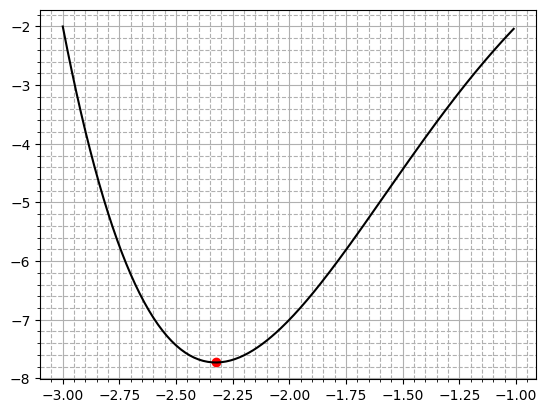

In [40]:
answer = fbn_method(target_f, a, b, 20)
print('Минимум в точке: {xm} \nЗначение: {ym} \nТочность: {accuracy}'.format(**answer))

xs = [a+i*0.01 for i in range((b-a)*100)]
ys = [target_f(x) for x in xs]

plt.minorticks_on()
plt.grid(which='major')
plt.grid(which='minor', linestyle='--')
plt.plot(xs, ys, color='black')
plt.scatter(answer['xm'], answer['ym'], color='r')
plt.show()